In [1]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.2
    Uninstalling statsmodels-0.13.2:
      Successfully uninstalled statsmodels-0.13.2
  Using cached pmdarima-2.0.3-cp39-cp39-win_amd64.whl (572 kB)


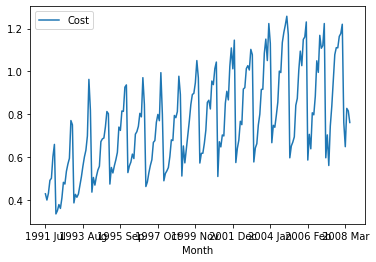

In [2]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


Using the above data set 
1)Test stationary of the 
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

In [3]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


In [5]:
#Question 1 : 
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap1['Cost'])
print('ADF Statistic: \eulerf' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: \eulerf
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


Answer: 
H0: time series is not stationary 
H1: time series is stationary 

for this question we choose 5% significant level. p value is higher than 0.05 and so we accept H0, it means time series is not stationary.

---



ADF Statistic: -3.365938
p-value: 0.012176
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


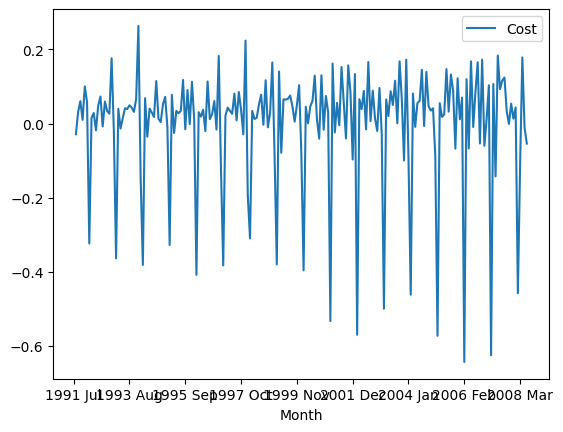

In [19]:
# Question 2
fd_ap = ap1 - ap1.shift(1)
fd_ap.plot()

from statsmodels.tsa.stattools import adfuller
fd_ap=fd_ap.dropna()
result = adfuller(fd_ap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

H0: The first difference of the time series is non-stationary.\
H1: The first difference of the time series is stationary.\
the p value is less than 0.05 and reject null hypotesis. it means the first difference of the time series is stationary.

ADF Statistic: -5.070403
p-value: 0.000016
Critical Values:
	1%: -3.468
	5%: -2.878
	10%: -2.576


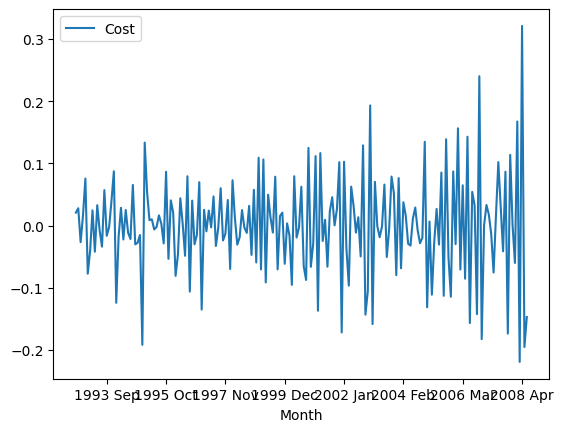

In [20]:
sd_ap = fd_ap - fd_ap.shift(12)
sd_ap.plot()

from statsmodels.tsa.stattools import adfuller
sd_ap=sd_ap.dropna()
result = adfuller(sd_ap['Cost'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

H0: The seasonal difference of the time series is non-stationary.\
H1: The seasonal difference of the time series is stationary.\
the p value is less than 0.05 and reject null hypotesis. it means the seasonal difference of the time series is stationary.

First Difference


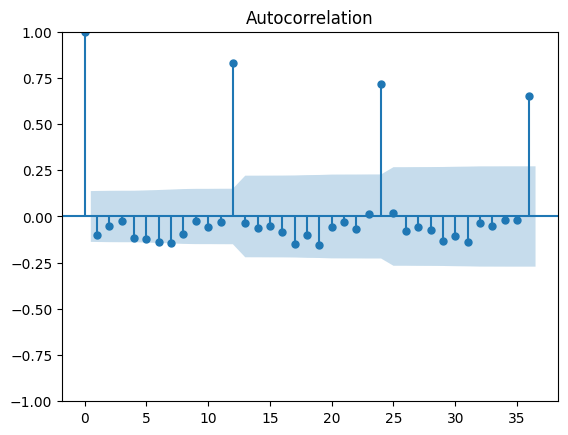

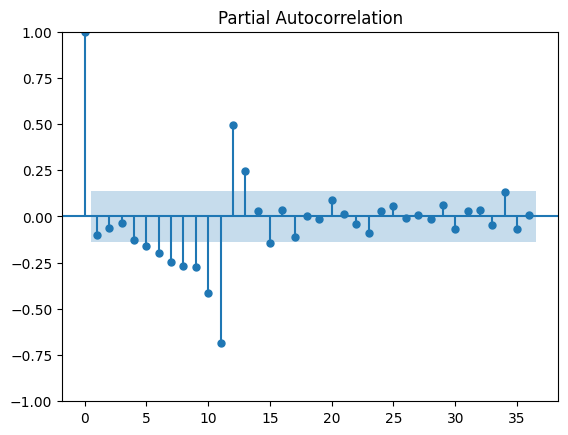


 Seasonal Difference


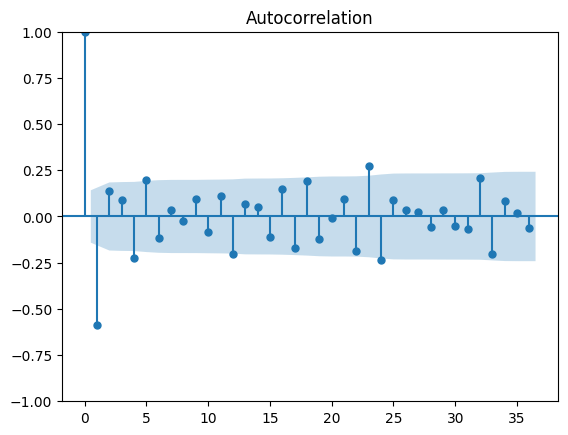

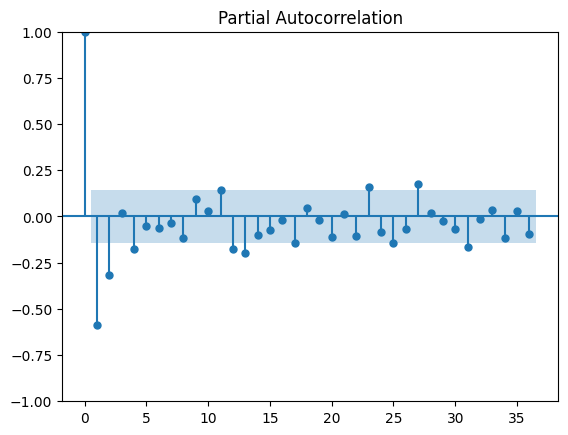

In [24]:
# Question 3
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

print('First Difference')
fig = tsaplots.plot_acf(fd_ap['Cost'], lags=36)
fig = tsaplots.plot_pacf(fd_ap['Cost'], lags=36)
plt.show()

print('\n Seasonal Difference')
fig = tsaplots.plot_acf(sd_ap['Cost'], lags=36)
fig = tsaplots.plot_pacf(sd_ap['Cost'], lags=36)
plt.show()

In [35]:
# Question 4
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(ap1['Cost'],order=(0,1,1),seasonal_order=(0,1,1,12))
model1_fit=model1.fit()
print(model1_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Cost   No. Observations:                  204
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 279.164
Date:                            Sat, 13 May 2023   AIC                           -552.329
Time:                                    17:48:47   BIC                           -542.572
Sample:                                07-01-1991   HQIC                          -548.377
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7581      0.046    -16.442      0.000      -0.848      -0.668
ma.S.L12      -0.5650      0.056   

In [36]:
model2=SARIMAX(ap1['Cost'],order=(1,1,1),seasonal_order=(0,1,0,12))
model2_fit=model2.fit()
print(model2_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                Cost   No. Observations:                  204
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                 264.817
Date:                             Sat, 13 May 2023   AIC                           -523.634
Time:                                     17:48:56   BIC                           -513.878
Sample:                                 07-01-1991   HQIC                          -519.682
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2800      0.074     -3.777      0.000      -0.425      -0.135
ma.L1         -0.5769      

model1 has less aic score, it means the better model is model1.

In [32]:
# Question 5
train = ap1.iloc[:-12]
test = ap1.iloc[-12:]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


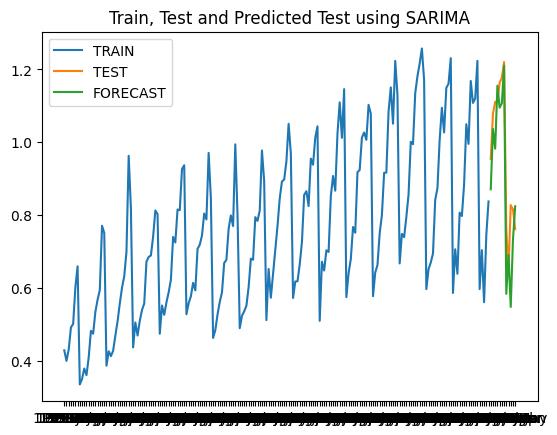

In [37]:
# Question 6
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train['Cost'],order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit=model.fit()
test_prediction = model_fit.forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']
#As we take ln , convert back to original series using exp


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using SARIMA');

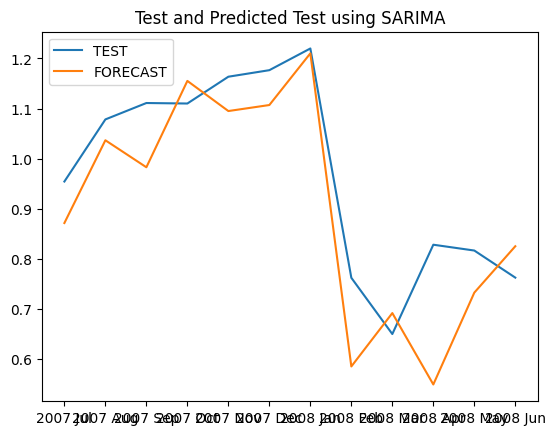

In [38]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using SARIMA');

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.0909267965018316
Mean Squared Error = 0.013240538113031657
Mean Absolute Percentage Error = 10.22899397100286


Question 7\
 Additive method is appropriate when the seasonal variations in the series are roughly constant throughout the series, while the multiplicative method is appropriate when the seasonal variations increase or decrease relative to the level of the series.\
 For this time series, additive method is mreo suitable.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


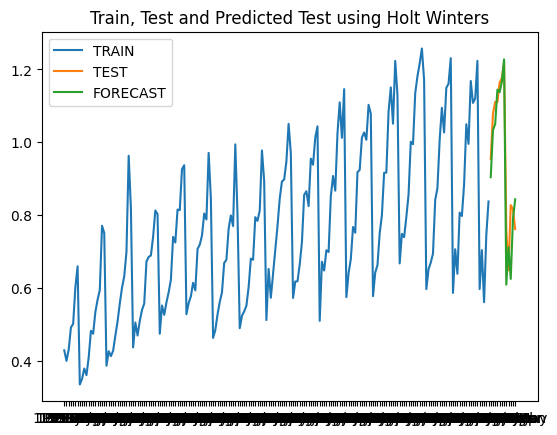

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit()
test_prediction = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters');

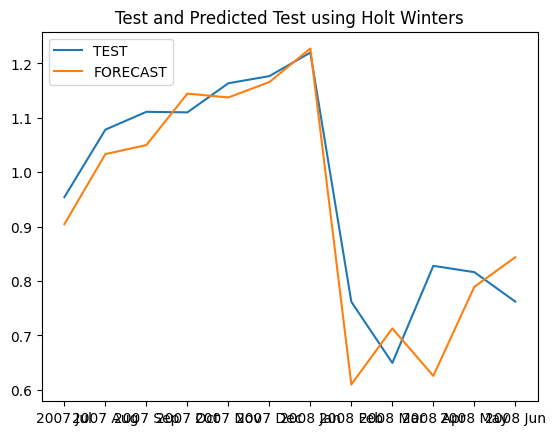

In [63]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using Holt Winters');

In [64]:
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.06342259958610598
Mean Squared Error = 0.007144180936718845
Mean Absolute Percentage Error = 7.494821834098765


Question 8\
To determine additive or multiplicative, use same methods with Holt Winters. if the seasonal variations in the series are roughly constant throughout the series,then additive. while the multiplicative method is appropriate when the seasonal variations increase or decrease relative to the level of the series.For this time series, additive method is more suitable.\
Dampening is the possibility that the trend in the series may not continue indefinitely at the same rate.If the trend appears to be slowing down over time, a dampening parameter may be appropriate. However, in this time series, rate same as constant and dumping is not need.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using ETS')

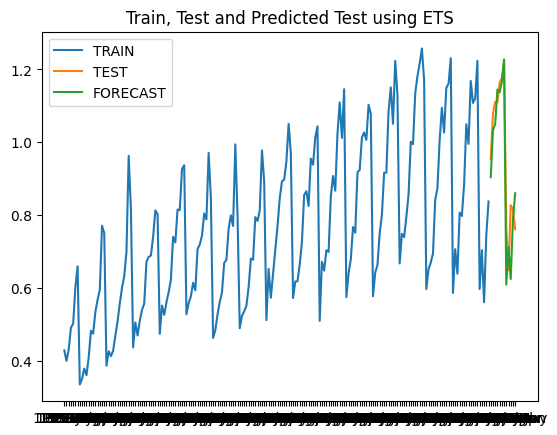

In [65]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_prediction=ETSModel(train['Cost'],error='add', trend='add',seasonal='add',damped_trend=False, seasonal_periods=12).fit().forecast(12)
test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS')

Text(0.5, 1.0, 'Test and Predicted Test using ETS')

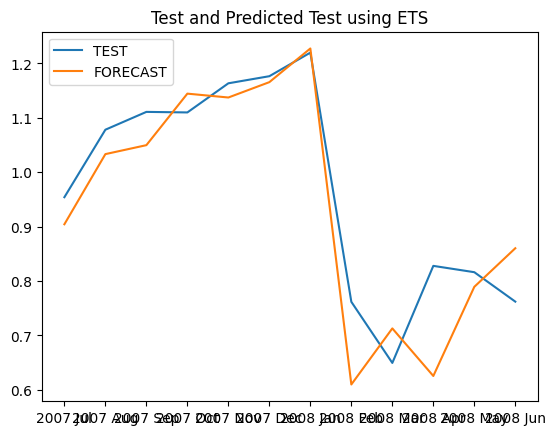

In [66]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using ETS')

In [67]:
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
import numpy as np
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.06483204407134852
Mean Squared Error = 0.007396217456696528
Mean Absolute Percentage Error = 7.678872142117192


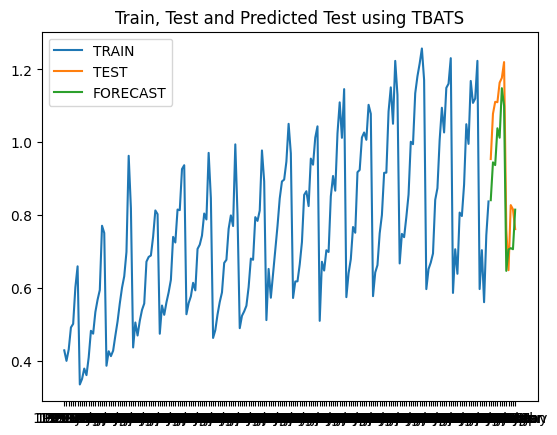

In [52]:
# Question 9
from tbats import TBATS, BATS
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=False,  
    use_box_cox=False 
)
model = estimator.fit(train)
test_prediction = model.forecast(steps=12)

test_prediction=pd.DataFrame(test_prediction)
new_index = test.index
test_prediction=test_prediction.set_index(new_index)
test_prediction.columns=['Cost']


plt.plot(train['Cost'],label='TRAIN')
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

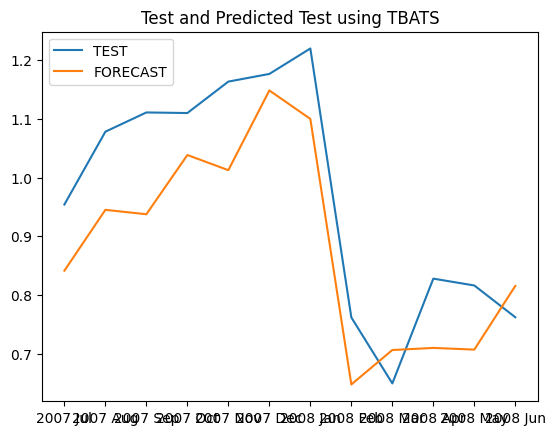

In [53]:
plt.plot(test['Cost'],label='TEST')
plt.plot(test_prediction,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Test and Predicted Test using TBATS');

In [57]:
print(f'Mean Absolute Error = {mean_absolute_error(test,test_prediction)}')
print(f'Mean Squared Error = {mean_squared_error(test,test_prediction)}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_prediction) )}')

Mean Absolute Error = 0.10345093531057847
Mean Squared Error = 0.012378694197052639
Mean Absolute Percentage Error = 10.81564708544542


Question 10\
The lowest MAPE for this time series was observed on Holt Winters model.